# Demonstration of ESG module

## Modelling stocks with GBM and rates with Ornstein–Uhlenbeck SDE <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from project.source.noise import NoiseGenerator
from project.source.esg import EconomicScenarioGenerator

In [2]:
# observations
index_df = pd.read_csv('../data/index.csv',index_col='price_date')

In [3]:
N = 100 # simulations
interval = 12 # monthly
T = 15 # years
steps = interval * T

In [4]:
# Simulation parameters (from calibration)
s0 = np.array([224.0, 234.0, 0.03]) # initial value
a = np.array([0.0, 0.0, 0.09]) # speed of reversion (rates)
mu = np.array([0.094, 0.094, -0.007]) # drift (stocks), long term mean level (rates)
sigma = np.array([0.16, 0.16, 0.007]) # volatility
corrmatrix = np.array([[1.0, 1.0, 0.2], [1.0, 1.0, 0.2], [0.2, 0.2, 1.0]])

Note that corrmatrix definitely is singular!

In [5]:
NG = NoiseGenerator()
dB = NG.normal_steps(corrmatrix, N * steps)
ESG = EconomicScenarioGenerator(s0, a, mu, sigma, dB)

In [8]:
EQ, IR = ESG.get_scenarios(N, steps, interval)
print(EQ.shape)
print(IR.shape)

(100, 2, 180)
(100, 1, 180)


# Stock

## $dS = \mu S dt + \sigma S dB$

<Axes: xlabel='price_date'>

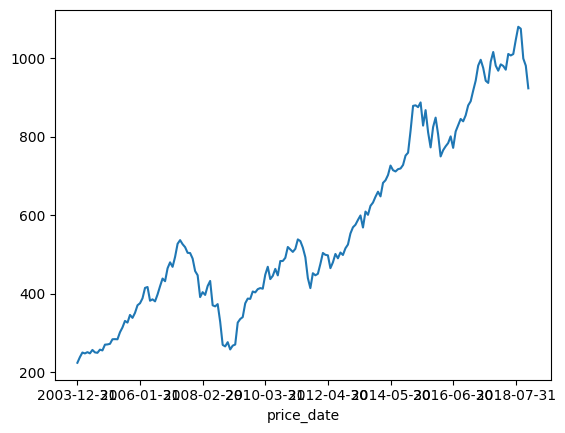

In [9]:
index_df['EQ_SWE'].plot()

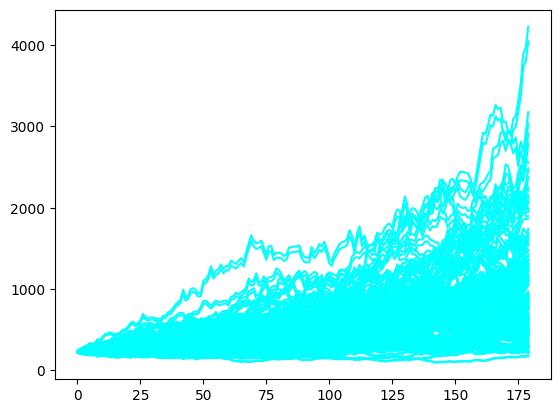

In [10]:
for s in EQ:
    plt.plot(s.T, color='cyan')

# Interest rate
## $dr = a(\mu - r) dt + \sigma dB$

<Axes: xlabel='price_date'>

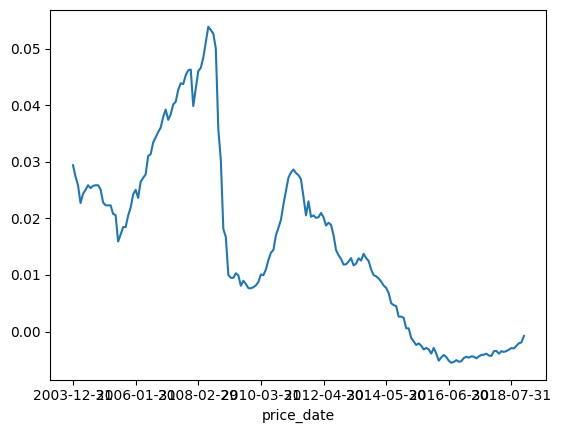

In [11]:
index_df['IR_1'].plot()

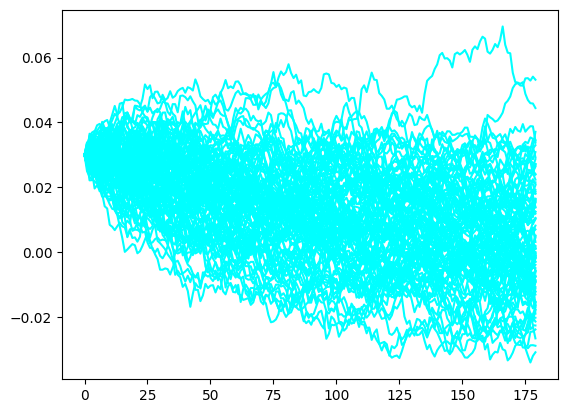

In [12]:
for r in IR:
    plt.plot(r.T, color='cyan')